In [4]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from utils import matplotlib_setup
from os.path import join
from glob import glob
import ntpath
%matplotlib inline


In [52]:
dataroot = '/data/juma/data/net_intrusion/ids18/CSVs_r_1.0_m_1.0'
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

In [1]:
def plot_bars_legacy(bars,category_names, ylabel='Flow Visibility\n Rate (%)',xlabel=None ):
    category_names = [cat.replace('Macro average Observation Rate', 'Avg. of Malicous') for cat in category_names]

    plt = matplotlib_setup()
    # set width of bar
    barWidth = 0.144
    N = len(category_names)
    assert N==len(bars['SRS']), "#Categories and #bars do not match {} vs {}"\
    .format(N, len(bars['SRS']))
    
    # Set position of bar on X axis
    r1 = np.arange(N)
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
 
    # Make the plot
    fig, ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(60,12))
    ax.grid(linewidth=3,axis='y', color='grey')
    plt.bar(r1, bars['FFS'], width=barWidth, edgecolor='white', label='Fast Filtered Sampling (FFS)',\
            hatch=patterns[0])
    plt.bar(r2, bars['SFS'], width=barWidth, edgecolor='white', label='SketchFlow Sampling (SFS)',\
            hatch=patterns[1])
    plt.bar(r3, bars['SGS'], width=barWidth, edgecolor='white', label='Sketch Guided Sampling (SGS)',\
            hatch=patterns[2])
    plt.bar(r4, bars['SRS'], width=barWidth, edgecolor='white', label='Simple Random Sampling (SRS)',\
            hatch=patterns[3])
    
    # Add xticks on the middle of the group bDejaVu Sansars
    plt.ylabel(ylabel)
    #plt.xlabel(xlabel)
    plt.ylim([0,130])
    plt.xticks([r + barWidth for r in range(N)] ,category_names,rotation=30)
    plt.legend(ncol=4,fancybox=True, framealpha=0.3)
    plt.tight_layout()

    return plt

In [9]:
def get_obsr_rate(d):
    return pd.read_csv(join(d,'observation_rate.csv'))


/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_10/FFS_(8,16,4)_l FFS
/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_10/SGS_e_0.05_l SGS
/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_10/SFS_SI_9.77_l SFS
/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_10/SRS_SI_10_l SRS


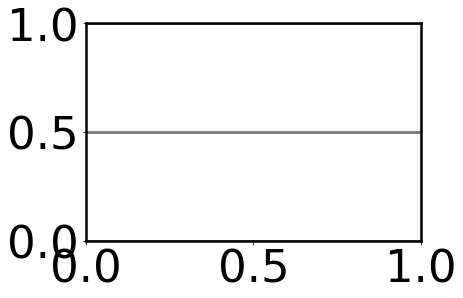

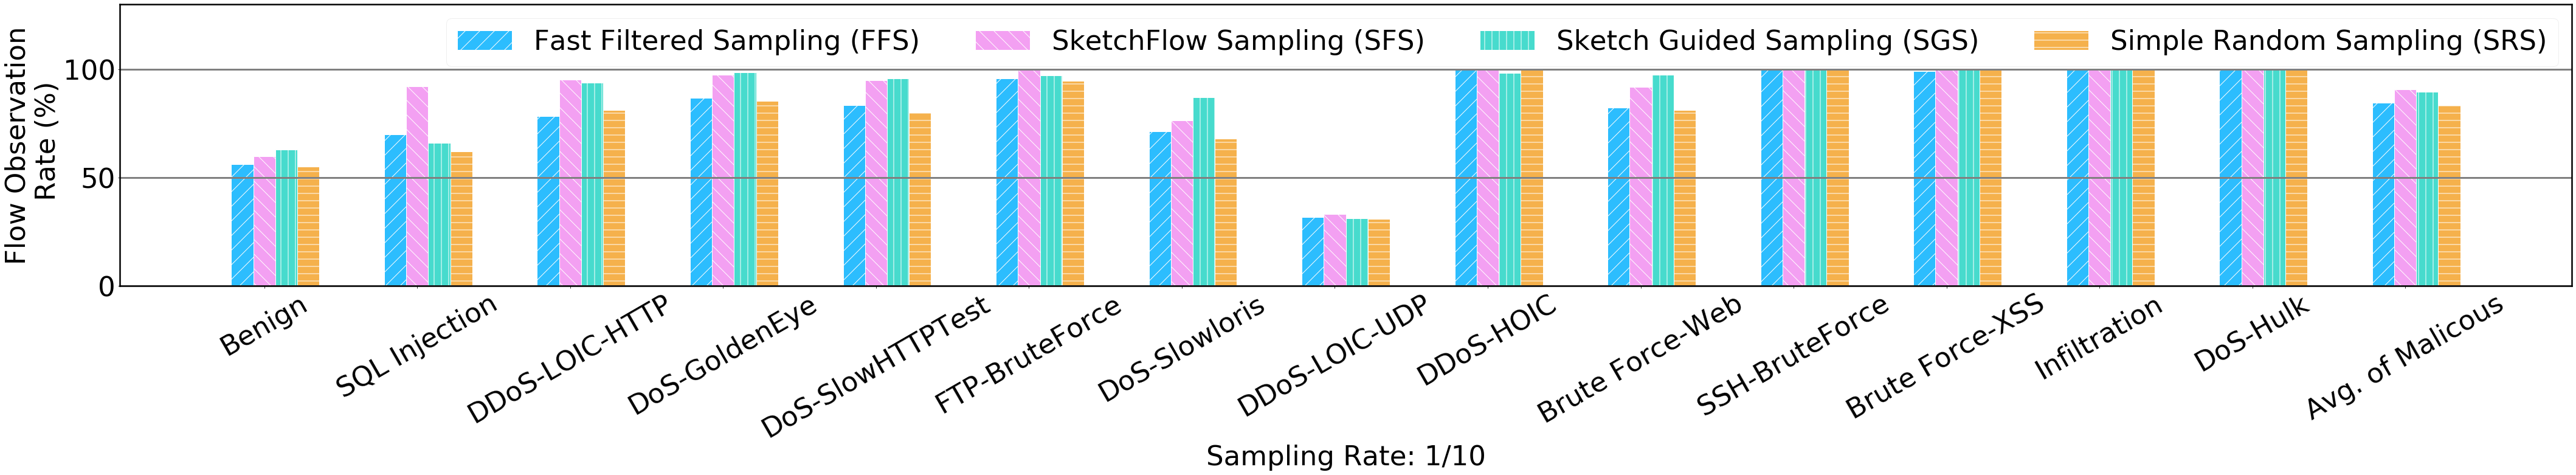

In [19]:
root = '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_10'
sdirs = glob(join(root,'*_l'))
bars = {}
for sdir in sdirs:
    sampler_name = ntpath.basename(sdir)[:3]
    print(sdir, sampler_name)
    df = get_obsr_rate(sdir)
    bars[sampler_name]=df['Observation rate'].values
    
plot_bars(bars, category_names, xlabel = 'Sampling Rate: 1/10')
plt.savefig(join(dataroot,'obsr_rate_per_cat_si_10.png'))
plt.show()


/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_100/FFS_(8,16,40)_l FFS
/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_100/SGS_e_1_l SGS
/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_100/SRS_SI_100_l SRS
/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_100/SFS_SI_95.33_l SFS


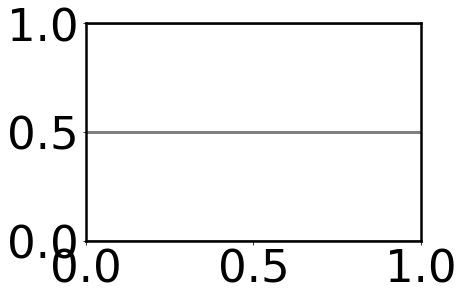

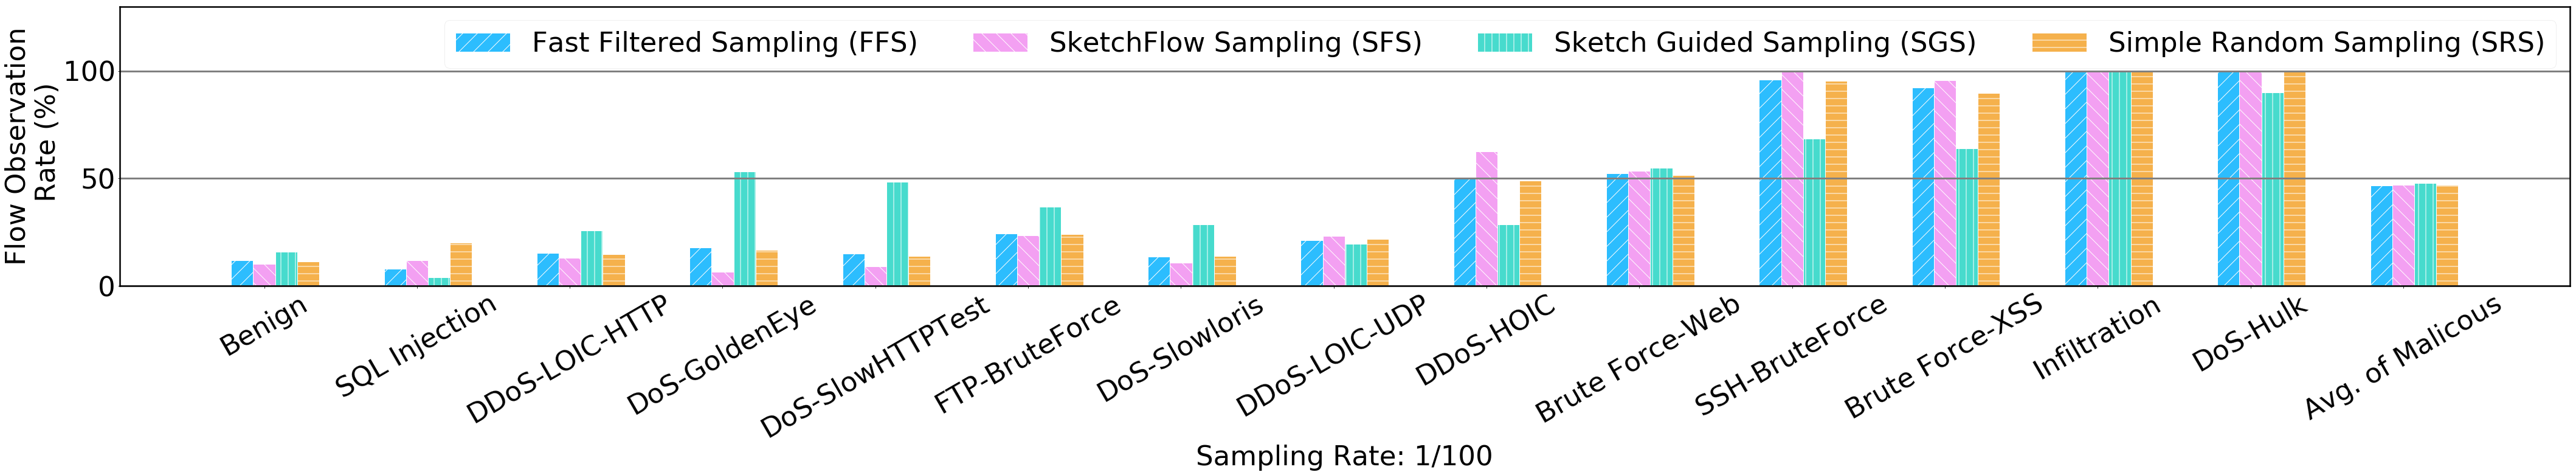

In [39]:

root = '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_100'
sdirs = glob(join(root,'*_l'))
bars = {}
for sdir in sdirs:
    sampler_name = ntpath.basename(sdir)[:3]
    print(sdir, sampler_name)
    df = get_obsr_rate(sdir)
    bars[sampler_name]=df['Observation rate'].values
    category_names = df['Label'].values
plot_bars(bars, category_names, xlabel = 'Sampling Rate: 1/100')
plt.savefig(join(root,'obsr_rate_per_cat_si_100.png'))
plt.show()


/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_1000/SGS_e_11.5_l SGS
/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_1000/FFS_(8,16,400)_l FFS
/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_1000/SFS_SI_685.08_l SFS
/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_1000/SRS_SI_1000_l SRS


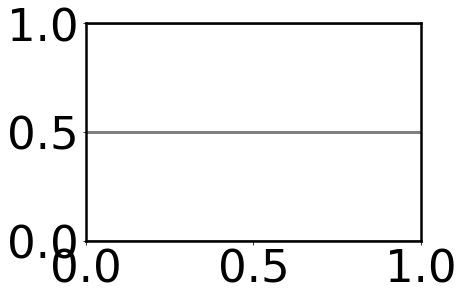

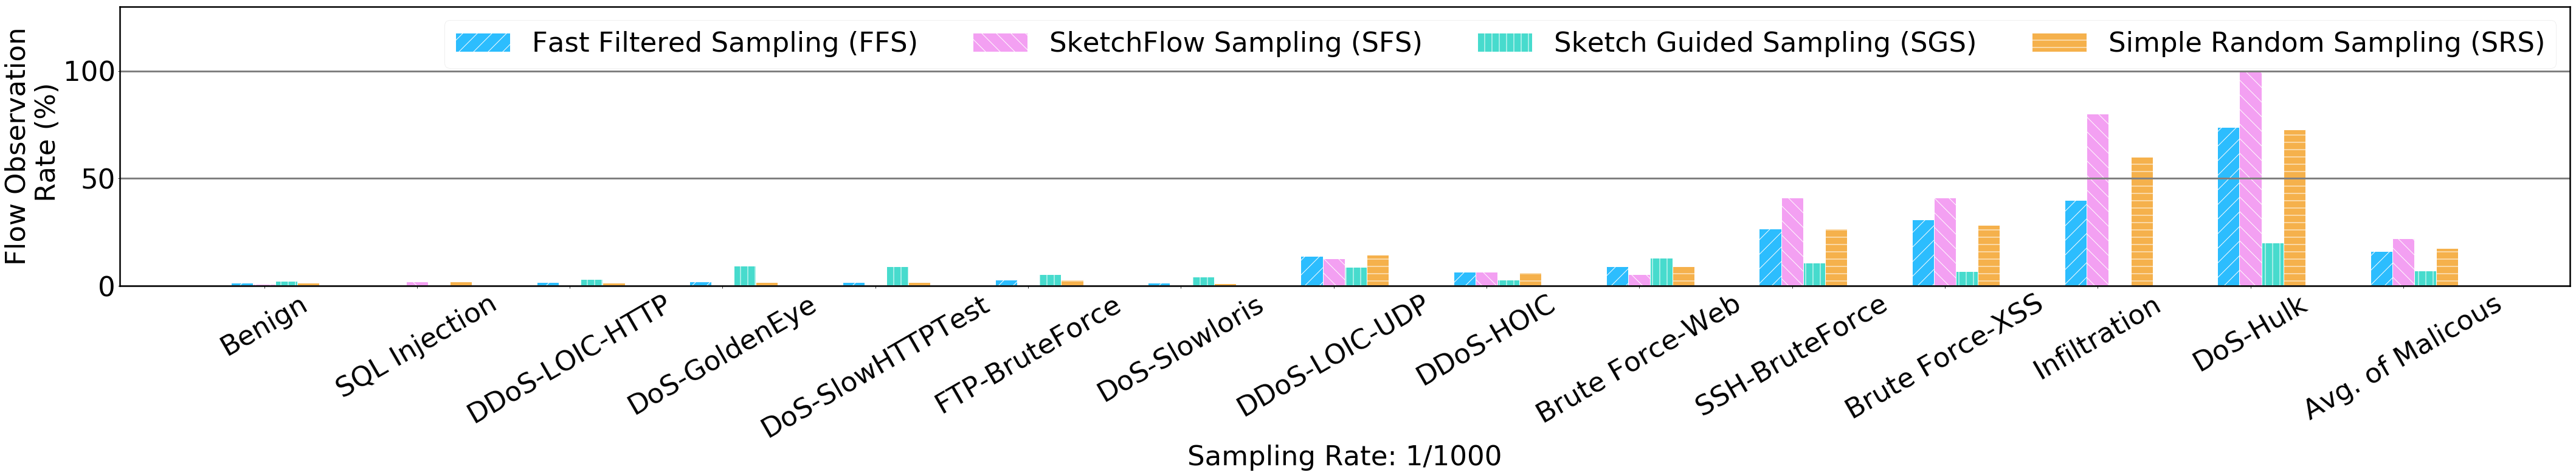

In [38]:
root = '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_1000'
sdirs = glob(join(root,'*_l'))
bars = {}
for sdir in sdirs:
    sampler_name = ntpath.basename(sdir)[:3]
    print(sdir, sampler_name)
    df = get_obsr_rate(sdir)
    bars[sampler_name]=df['Observation rate'].values
    category_names = df['Label'].values
plot_bars(bars, category_names, xlabel = 'Sampling Rate: 1/1000')
plt.savefig(join(dataroot,'obsr_rate_per_cat_si_1000.png'))
plt.show()


# Combined

In [49]:
def plot_bars(ax,bars,category_names, ylabel='Flow Visibility\n Rate (%)',xlabel=None , legend=False):
    category_names = [cat.replace('Macro average Observation Rate', 'Avg. of Malicous') for cat in category_names]

    plt = matplotlib_setup()
    # set width of bar
    barWidth = 0.144
    N = len(category_names)
    assert N==len(bars['SRS']), "#Categories and #bars do not match {} vs {}"\
    .format(N, len(bars['SRS']))
    
    # Set position of bar on X axis
    r1 = np.arange(N)
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
 
    # Make the plot
    ax.grid(linewidth=3,axis='y', color='grey')
    ax.bar(r1, bars['FFS'], width=barWidth, edgecolor='white', label='Fast Filtered Sampling (FFS)',\
            hatch=patterns[0])
    ax.bar(r2, bars['SFS'], width=barWidth, edgecolor='white', label='SketchFlow Sampling (SFS)',\
            hatch=patterns[1])
    ax.bar(r3, bars['SGS'], width=barWidth, edgecolor='white', label='Sketch Guided Sampling (SGS)',\
            hatch=patterns[2])
    ax.bar(r4, bars['SRS'], width=barWidth, edgecolor='white', label='Simple Random Sampling (SRS)',\
            hatch=patterns[3])
    
    # Add xticks on the middle of the group bDejaVu Sansars
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel, labelpad=2, fontsize=50)
    ax.set_ylim([0,130])
    ax.set_xticks([r + barWidth for r in range(N)])
    ax.set_xticklabels(category_names,rotation=30)
    
    ax.legend(ncol=4,fancybox=True, framealpha=0.3)
    return ax

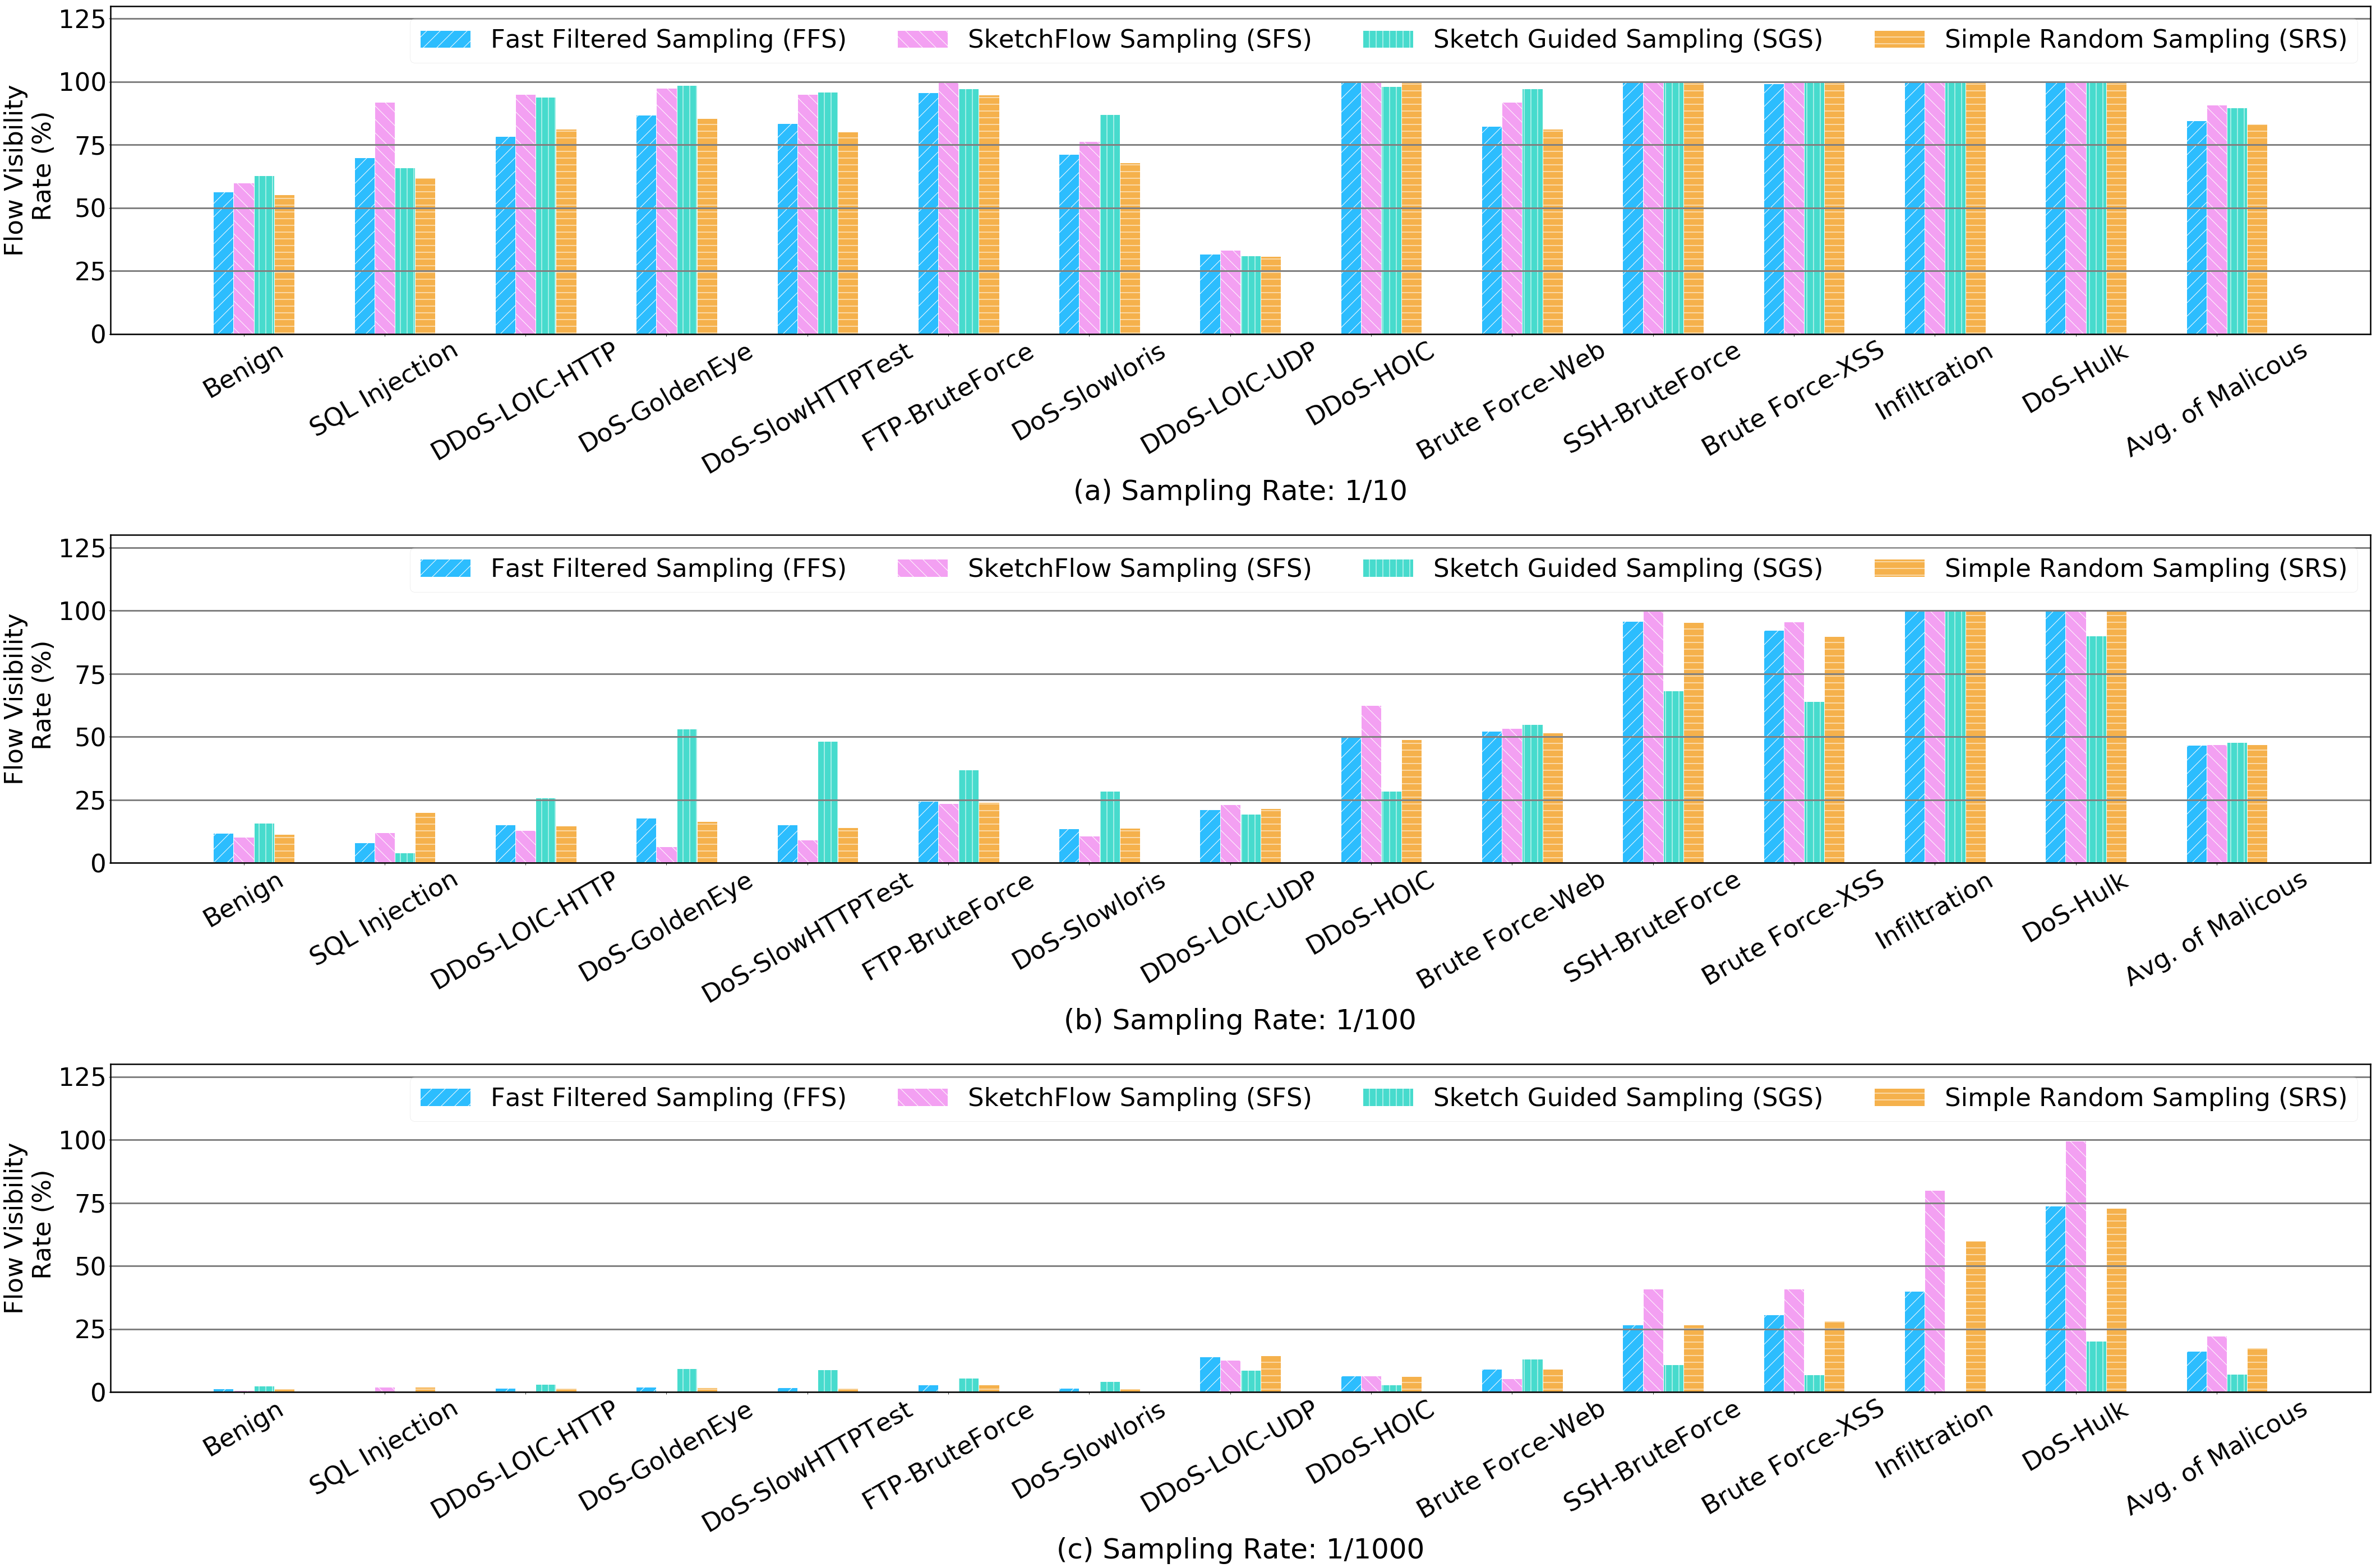

In [53]:
fig, axs = plt.subplots(nrows=3,ncols=1, figsize=(60,40))
ax = axs[0]


# 1/10
root = '/data/juma/data/net_intrusion/ids18/CSVs_r_1.0_m_1.0/SI_10'
sdirs = glob(join(root,'*_l'))
bars = {}
for sdir in sdirs:
    sampler_name = ntpath.basename(sdir)[:3]    
    df = get_obsr_rate(sdir)
    bars[sampler_name]=df['Observation rate'].values
    category_names = df['Label'].values
plot_bars(axs[0],bars, category_names, xlabel = '(a) Sampling Rate: 1/10', legend=True)


# 1/100
root = '/data/juma/data/net_intrusion/ids18/CSVs_r_1.0_m_1.0/SI_100'
sdirs = glob(join(root,'*_l'))
bars = {}
for sdir in sdirs:
    sampler_name = ntpath.basename(sdir)[:3]
    df = get_obsr_rate(sdir)
    bars[sampler_name]=df['Observation rate'].values
    category_names = df['Label'].values
plot_bars(axs[1],bars, category_names, xlabel = '(b) Sampling Rate: 1/100')


# 1/1000
root = '/data/juma/data/net_intrusion/ids18/CSVs_r_1.0_m_1.0/SI_1000'
sdirs = glob(join(root,'*_l'))
bars = {}
for sdir in sdirs:
    sampler_name = ntpath.basename(sdir)[:3]
    df = get_obsr_rate(sdir)
    bars[sampler_name]=df['Observation rate'].values
    category_names = df['Label'].values
plot_bars(axs[2],bars, category_names, xlabel = '(c) Sampling Rate: 1/1000')

fig.tight_layout()
plt.xticks(rotation=30)
plt.savefig(join(dataroot,'obsr_rate_per_cat_si_combined.png'))
plt.show()
    